In [25]:
# modeling of individual pollutants
import statsmodels.tsa.api as tsa
import statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv(r"F:\omdena-mumbai-chapter-air-quality\src\tasks\task-2-eda\final_powai_df.csv", index_col=0)
df.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Date
1,2021-01-01 00:00:00,79.18,116.33,0.36,10.86,11.22,7.79,5.72,0.41,107.72,2021-01-01
2,2021-01-01 00:15:00,75.00,107.00,0.53,9.04,9.58,7.64,5.52,0.41,104.27,2021-01-01
3,2021-01-01 00:30:00,75.00,107.00,1.02,10.77,11.79,7.78,6.18,0.53,98.05,2021-01-01
4,2021-01-01 00:45:00,75.00,107.00,1.47,17.84,19.33,8.12,6.69,0.60,86.91,2021-01-01
5,2021-01-01 01:00:00,76.40,107.44,1.46,17.81,19.28,8.57,6.40,0.59,83.05,2021-01-01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76321 entries, 1 to 76321
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  76321 non-null  object 
 1   PM2.5      76321 non-null  float64
 2   PM10       76321 non-null  float64
 3   NO         76321 non-null  float64
 4   NO2        76321 non-null  float64
 5   NOx        76321 non-null  float64
 6   NH3        76321 non-null  float64
 7   SO2        76321 non-null  float64
 8   CO         76321 non-null  float64
 9   Ozone      76321 non-null  float64
 10  Date       76321 non-null  object 
dtypes: float64(9), object(2)
memory usage: 7.0+ MB


In [12]:
df.isnull().any()

From Date    False
PM2.5        False
PM10         False
NO           False
NO2          False
NOx          False
NH3          False
SO2          False
CO           False
Ozone        False
Date         False
dtype: bool

In [13]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
count,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000,76321.000000
mean,48.589556,92.203691,9.692436,20.382562,25.924529,4.450456,9.215890,0.646329,28.499424
std,35.014979,54.382158,11.790700,12.627772,20.765238,5.047033,12.037002,0.489995,35.955481
min,0.730000,5.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.440000,55.870000,2.090000,12.430000,9.410000,1.020000,1.150000,0.220000,1.660000
50%,44.567449,76.993327,7.290000,17.783457,23.350000,3.870000,4.880000,0.680000,14.320000
75%,68.000000,120.000000,10.600000,25.590000,38.590000,6.690000,10.670000,0.930000,42.390000
max,585.770000,587.200000,185.310000,148.270000,261.410000,342.670000,99.820000,3.940000,199.930000


- ACF test

In [19]:
auto_corr_array = tsa.stattools.acf(df['PM2.5'], nlags=10)
auto_corr_array

array([1.        , 0.97780873, 0.95259484, 0.92734031, 0.90425621,
       0.88355387, 0.86489445, 0.84626252, 0.8286732 , 0.81477857,
       0.80242772])

Above method shows auto_correlation with each lagged time-series

- Stationarity test

In [22]:
adfuller = tsa.stattools.adfuller(df['PM2.5'], maxlag=10, regression="ct", store=True)
adfuller

(-25.0227375332124,
 0.0,
 {'1%': -3.9588886407096857,
  '5%': -3.410547535295761,
  '10%': -3.1270838835203616},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1550590ffd0>)

- Time-series decomposition

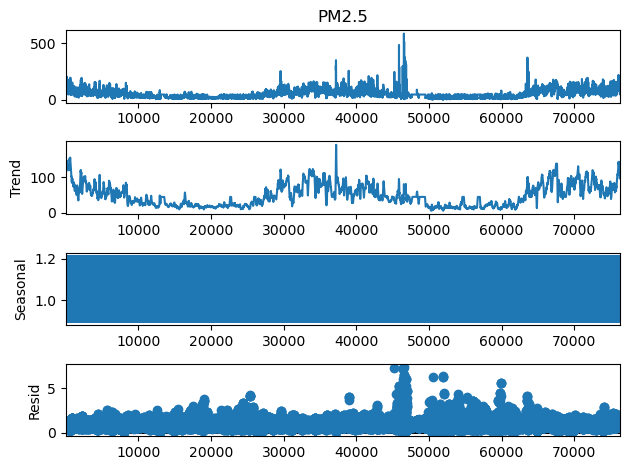

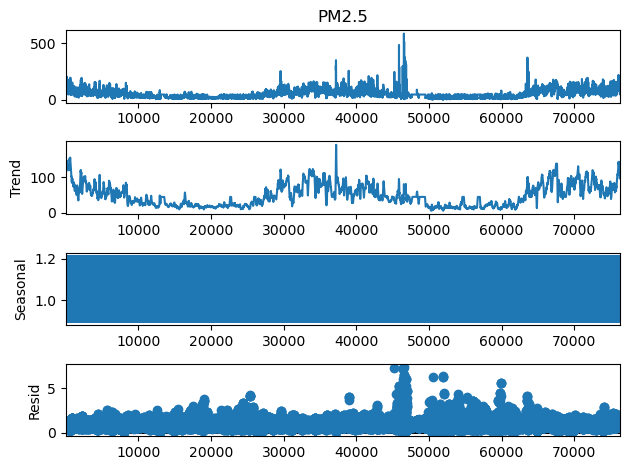

In [30]:
ts_decompose = statsmodels.tsa.seasonal.seasonal_decompose(df['PM2.5'], model='multiplicative', period=96)
ts_decompose.plot()

- Auto-correlation and partial auto-correlation plots

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [32]:
# plot the acf_plot

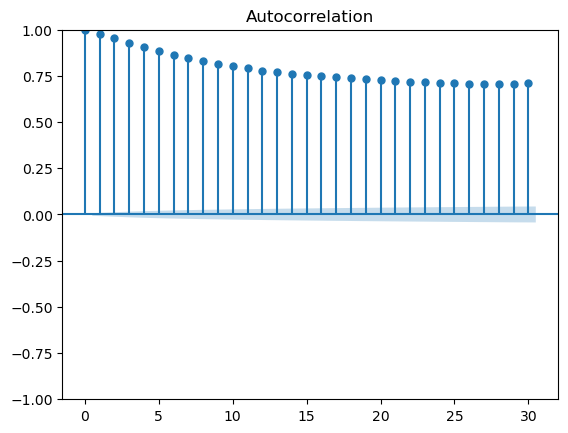

In [35]:
acf_plot = plot_acf(df['PM2.5'], lags=30)